In [162]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [163]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Suppresses most TensorFlow logging

In [164]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [165]:
df.head()
print(df.shape)

(10000, 14)


In [166]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [167]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [168]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [169]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# **Training the dataset**

In [170]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=0.2,random_state=42)

In [171]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
xtrain_scaled=scalar.fit_transform(xtrain)
xtest_scalar=scalar.transform(xtest)


In [172]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [173]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [174]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [175]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])

In [176]:
history=model.fit(xtrain_scaled,ytrain,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.5089 - loss: 0.7211 - val_Accuracy: 0.7600 - val_loss: 0.5812
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7263 - loss: 0.5957 - val_Accuracy: 0.8025 - val_loss: 0.5057
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7978 - loss: 0.5237 - val_Accuracy: 0.8050 - val_loss: 0.4678
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8217 - loss: 0.4615 - val_Accuracy: 0.8025 - val_loss: 0.4464
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8005 - loss: 0.4696 - val_Accuracy: 0.8050 - val_loss: 0.4322
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8084 - loss: 0.4504 - val_Accuracy: 0.8050 - val_loss: 0.4224
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.8186 - loss: 0.4324 - val_Accuracy: 0.8000 - val_loss: 0.4154
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.8095 - loss: 0.4280 - val_Accuracy: 0.8050 - v

In [177]:
model.layers[0].get_weights()

[array([[ 2.82077760e-01, -1.10944636e-01,  3.12138975e-01,
         -6.95676580e-02,  1.43915907e-01,  5.52951396e-02,
          2.16206253e-01, -3.42891753e-01,  4.14410196e-02,
         -5.19903451e-02, -2.89137959e-01],
        [-7.79655516e-01, -8.47993135e-01,  2.09306434e-01,
          2.01410130e-01,  1.36003166e-01, -2.51468092e-01,
          4.42904383e-01,  6.30600750e-03,  4.21583205e-01,
          2.54091054e-01,  4.82164621e-01],
        [-5.88223696e-01,  8.69995877e-02,  1.14575615e-02,
          4.49926928e-02, -1.21245511e-01,  8.28175689e-05,
          2.66041040e-01, -1.40068933e-01,  3.77275407e-01,
          2.96628326e-01,  5.06598473e-01],
        [-5.43702364e-01,  1.19755313e-01,  3.34862918e-01,
         -1.19901419e-01, -1.79719701e-02, -2.93337256e-01,
          3.55299920e-01, -2.16911241e-01,  2.67111175e-02,
         -6.58846736e-01,  7.69542813e-01],
        [-3.59776022e-05, -1.72139421e-01, -2.05934912e-01,
         -7.63952196e-01, -1.07271469e+00, -

In [178]:
ylog=model.predict(xtest_scalar)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [179]:
ypred=np.where(ylog>0.5,1,0)

In [180]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.851375

In [181]:
history.history


{'Accuracy': [0.5981249809265137,
  0.7731249928474426,
  0.8031250238418579,
  0.8037499785423279,
  0.8062499761581421,
  0.8068749904632568,
  0.809374988079071,
  0.8149999976158142,
  0.8162500262260437,
  0.8187500238418579,
  0.824999988079071,
  0.8287500143051147,
  0.8293750286102295,
  0.8337500095367432,
  0.8349999785423279,
  0.8362500071525574,
  0.8368750214576721,
  0.8387500047683716,
  0.8387500047683716,
  0.8418750166893005,
  0.8431249856948853,
  0.8431249856948853,
  0.8475000262260437,
  0.8506249785423279,
  0.8550000190734863,
  0.8550000190734863,
  0.8556249737739563,
  0.8575000166893005,
  0.8575000166893005,
  0.8587499856948853,
  0.8606250286102295,
  0.859375,
  0.8612499833106995,
  0.8600000143051147,
  0.8600000143051147,
  0.8612499833106995,
  0.8606250286102295,
  0.862500011920929,
  0.8668749928474426,
  0.8656250238418579,
  0.8637499809265137,
  0.8662499785423279,
  0.8700000047683716,
  0.8668749928474426,
  0.8662499785423279,
  0.8656250

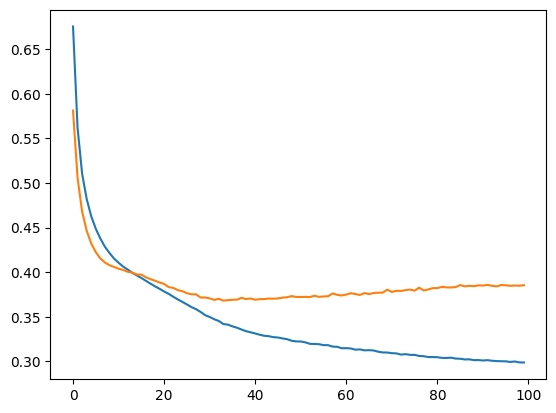

In [182]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

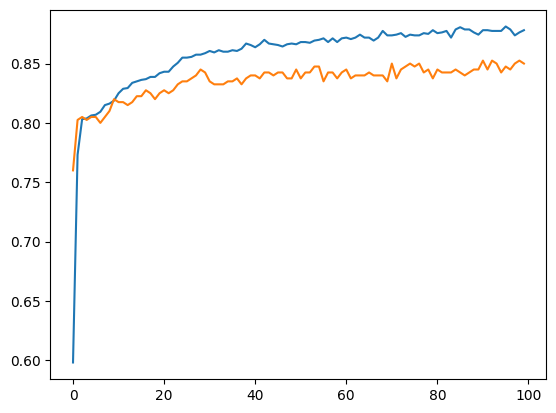

In [183]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])